# Supervised Machine Learning

## This script contains the following points:
### 01. Importing libraries
### 02. Importing Data
### 03. Data prep for regression analysis 
### 04. Binary logistic regression analysis
### 05. Imbalanced class handling, using SMOTE (Synthetic Minority Over-Sampling Technique) 
### 06. Random Forest Algorithm
### 07. XGBoost Algorithm

## 01. Importing libraries

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
import xgboost as xgb

## 02. Importing Data

In [2]:
# Define path
%run env_1.ipynb
path = path_1

In [53]:
#Import dataset
df_pipelines_failure = pd.read_excel(os.path.join(path, '02 Data', 'Prepared Data', 'pipes_failures_final.xlsx'), index_col = False)

In [54]:
df_pipelines_failure.columns

Index(['Unnamed: 0', 'pipe_age_2013', 'length', 'diameter', 'material',
       'soil_consistency', 'soil_aggressivity', 'groundwater', 'traffic_load',
       'stray_electricity', 'cause_of_damage', 'failure_occurred_on_pipe'],
      dtype='object')

In [55]:
df_pipelines_failure.head(5)

,Unnamed: 0,pipe_age_2013,length,diameter,material,soil_consistency,soil_aggressivity,groundwater,traffic_load,stray_electricity,cause_of_damage,failure_occurred_on_pipe
0,0,NaN,0.177445,600.0,4,4,3,1.0,1,4,NaN,0
1,1,NaN,0.143000,600.0,4,4,3,1.0,1,3,NaN,0
2,2,NaN,0.143000,600.0,4,4,3,1.0,1,3,NaN,0
3,3,NaN,0.185747,600.0,4,4,3,1.0,1,4,NaN,0
4,4,NaN,0.143000,600.0,4,4,3,1.0,1,3,NaN,0


## 03. Data prep for regression analysis 

### Null Hypothesis (H0): 
### "The combination of  unfavorable soil consistency and unfavorable traffic loading leads to occurrence of failures on cast iron pipes. The combination of unfavorable soil aggressivity and unfavorable position of stray electricity leads to occurrence of failures on ductile cast iron and steel pipes"

In [56]:
# Create independent and dependent variables
X = df_pipelines_failure[['soil_consistency', 'traffic_load', 'soil_aggressivity', 'stray_electricity']]
y = df_pipelines_failure['failure_occurred_on_pipe']

In [57]:
X

,soil_consistency,traffic_load,soil_aggressivity,stray_electricity
0,4,1,3,4
1,4,1,3,3
2,4,1,3,3
3,4,1,3,4
4,4,1,3,3
...,...,...,...,...
79341,1,1,1,4
79342,0,1,0,4
79343,1,1,1,4
79344,0,1,4,4


In [58]:
y

0        0
1        0
2        0
3        0
4        0
        ..
79341    0
79342    0
79343    0
79344    0
79345    0
Name: failure_occurred_on_pipe, Length: 79346, dtype: int64

In [59]:
# Inspect Unique Values:
for column in X.columns:
    print(f"Unique values in {column}: {X[column].unique()}")

Unique values in soil_consistency: [4 0 1 5 3 2]
Unique values in traffic_load: [1 2 3 4 5]
Unique values in soil_aggressivity: [3 4 1 2 0]
Unique values in stray_electricity: [4 3 2 1]


In [60]:
# Filter rows where soil_consistency and soil_aggressivity are not equal to 0, because code 0 is 'unknowen'
filtered_rows = (X['soil_consistency'] != 0) & (X['soil_aggressivity'] != 0)
X = X[filtered_rows]
y = y[filtered_rows]

In [61]:
# Check for NaN Values:
print(X.isnull().sum())

soil_consistency     0
traffic_load         0
soil_aggressivity    0
stray_electricity    0
dtype: int64


### Note:
### I've chosen to employ binary logistic regression for this analysis since my dependent variable, 'failure_occurred_on_pipe,' takes on binary values (0 or 1). Meanwhile, my independent variables are categorical in nature. Logistic regression is well-suited for scenarios where the outcome is binary, and it commonly involves converting categorical variables into dummy variables using a process known as one-hot encoding.

In [62]:
# Convert categorical variables to dummy variables (one-hot encoding)
X = pd.get_dummies(X, drop_first=True, columns=['soil_consistency', 'traffic_load', 'soil_aggressivity', 'stray_electricity'], prefix=['soil_consistency', 'traffic_load', 'soil_aggressivity', 'stray_electricity'])

In [63]:
X

,soil_consistency_2,soil_consistency_3,soil_consistency_4,soil_consistency_5,traffic_load_2,traffic_load_3,traffic_load_4,traffic_load_5,soil_aggressivity_2,soil_aggressivity_3,soil_aggressivity_4,stray_electricity_2,stray_electricity_3,stray_electricity_4
0,0,0,1,0,0,0,0,0,0,1,0,0,0,1
1,0,0,1,0,0,0,0,0,0,1,0,0,1,0
2,0,0,1,0,0,0,0,0,0,1,0,0,1,0
3,0,0,1,0,0,0,0,0,0,1,0,0,0,1
4,0,0,1,0,0,0,0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79336,0,0,1,0,0,0,0,0,0,1,0,0,0,0
79337,0,0,0,0,0,0,0,0,0,0,0,0,0,1
79340,0,1,0,0,0,0,0,0,0,1,0,0,0,1
79341,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [64]:
# Split data into a training set and a test set.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

## 4. Binary Logistic Regression 

## 4.1. Binary Logistic Regression for dataset 1 (including all pipes and the following environmental factors: 'soil_consistency', 'traffic_load', 'soil_aggressivity', 'stray_electricity)

#### Note: I will  use binary logistic regression for this scenario, because my dependent variable 'failure_occurred_on_pipe' is binary (0 or 1) and my independent variables are categorical. 

In [65]:
# Create a logistic regression model
logreg_1 = LogisticRegression()

In [66]:
# Fit the model on the training data
model_1 = logreg_1.fit(X_train, y_train)

In [67]:
# Make predictions on the test set
y_pred_1 = logreg_1.predict(X_test)

In [68]:
# Get coefficients and odds ratios
coefficients = pd.DataFrame(logreg_1.coef_[0], index=X.columns, columns=['Coefficient'])
odds_ratios = pd.DataFrame({'Odds Ratio': np.round(np.exp(logreg_1.coef_[0]), 4)}, index=X.columns)

# Print coefficients and odds ratios
print("Coefficients:")
print(coefficients)
print("\nOdds Ratios:")
print(odds_ratios)

Coefficients:
                     Coefficient
soil_consistency_2      0.150100
soil_consistency_3     -0.155777
soil_consistency_4     -0.126680
soil_consistency_5      0.103574
traffic_load_2         -0.350974
traffic_load_3         -0.112109
traffic_load_4         -0.668472
traffic_load_5         -0.280276
soil_aggressivity_2     0.275817
soil_aggressivity_3    -0.099557
soil_aggressivity_4     0.707204
stray_electricity_2    -0.240358
stray_electricity_3     0.448227
stray_electricity_4     0.145985

Odds Ratios:
                     Odds Ratio
soil_consistency_2       1.1620
soil_consistency_3       0.8557
soil_consistency_4       0.8810
soil_consistency_5       1.1091
traffic_load_2           0.7040
traffic_load_3           0.8939
traffic_load_4           0.5125
traffic_load_5           0.7556
soil_aggressivity_2      1.3176
soil_aggressivity_3      0.9052
soil_aggressivity_4      2.0283
stray_electricity_2      0.7863
stray_electricity_3      1.5655
stray_electricity_4      1.15

#### Note: 
#### Codes for soil_consistency: 1= very low cohesive, 2= low cohesive, 3= moderately cohesive, 4= highly cohesive, 5= very highly cohesive
#### Codes for soil_aggressivity: 1= Ia (low), 2= Ib (low), 3= II (moderately), 4= III (highly)
#### Codes for traffic_load: 1= none, 2= only passenger cars, 3= low (<100 trucks), 4= medium (up to 500 trucks), 5= high (up to 1000 trucks)
#### Codes for stray_electricity: 1= 0 - 1 m, 2= 1 - 5 m, 3= 5 - 10 m, 4= more than 10 m¶

The coefficients and odds ratios provide insights into how each variable is associated with the likelihood of the event (in this case, 'failure_occurred_on_pipe' being 1). 
These interpretations are based on the assumption that the reference levels are very low cohesive soil consistency, no traffic, Ia (low) soil aggressivity, and stray electricity in the range of 0 - 1 m. An odds ratio greater than 1 indicates an increase in the odds of failure, while an odds ratio less than 1 indicates a decrease.
 
### Here are some conclusions based on the coefficients and odds ratios:

#### Soil Consistency:

Low Cohesive (soil_consistency_2): It seems to increase the odds of failure, suggesting that areas with low cohesive soil might be more prone to failures compared to very low cohesive soil.
Moderately Cohesive (soil_consistency_3): It appears to decrease the odds of failure, indicating that moderately cohesive soil is associated with a lower likelihood of failures compared to very low cohesive soil.
Highly Cohesive (soil_consistency_4): The odds decrease, suggesting that highly cohesive soil is less likely to be associated with failures compared to very low cohesive soil.
Very Highly Cohesive (soil_consistency_5): The odds increase, indicating that very highly cohesive soil might be associated with a higher likelihood of failures compared to very low cohesive soil.
#### Traffic Load:

Only Passenger Cars (traffic_load_2): It significantly decreases the odds of failure, suggesting that areas with only passenger cars might have a lower likelihood of failures compared to areas with no traffic.
Low Traffic (traffic_load_3): It decreases the odds of failure, indicating that low traffic is associated with a lower likelihood of failures compared to no traffic.
Medium Traffic (traffic_load_4): It significantly decreases the odds of failure, suggesting that areas with medium traffic might have a significantly lower likelihood of failures compared to no traffic.
High Traffic (traffic_load_5): It decreases the odds of failure, indicating that high traffic is associated with a lower likelihood of failures compared to no traffic.
#### Soil Aggressivity:

Ib - Low (soil_aggressivity_2): It increases the odds of failure, suggesting that areas with Ib (low) soil aggressivity might be associated with a higher likelihood of failures compared to Ia (low).
II - Moderately (soil_aggressivity_3): It decreases the odds of failure, indicating that areas with II (moderately) soil aggressivity might have a lower likelihood of failures compared to Ia (low).
III - Highly (soil_aggressivity_4): It significantly increases the odds of failure, suggesting that areas with III (highly) soil aggressivity might have a significantly higher likelihood of failures compared to Ia (low).
#### Stray Electricity:

1 - 5 m (stray_electricity_2): It decreases the odds of failure, indicating that stray electricity in the range of 1 - 5 m is associated with a lower likelihood of failures compared to 0 - 1 m.
5 - 10 m (stray_electricity_3): It increases the odds of failure, suggesting that stray electricity in the range of 5 - 10 m might be associated with a higher likelihood of failures compared to 0 - 1 m.
More than 10 m (stray_electricity_4): It increases the odds of failure, indicating that stray electricity more than 10 m is associated with a higher likelihood of failures compared to 0 - 1 m.

#### While one might expect that unfavorable soil consistency, such as highly to very highly cohesive soil should have the biggest impact on failure occurrence, we have mixed results where  low or very highly cohesive soil have the biggest impact. The similar scenario for the other environmental factors. These mixed results could be due to various factors, including interactions between variables, non-linear relationships, or multicollinearity. It might be worthwhile to further investigate the specific relationships and interactions between these factors to better understand the observed patterns.

#### In summary, the interpretation of logistic regression results involves considering each level relative to the reference category, and sometimes the observed effects may not align with initial expectations. Further exploration and potentially more advanced modeling techniques may provide additional insights into the relationships between these variables.

In [69]:
# Evaluate the model
print('Accuracy:', accuracy_score(y_test, y_pred_1))
print('\nConfusion Matrix:\n', confusion_matrix(y_test, y_pred_1))
print('\nClassification Report:\n', classification_report(y_test, y_pred_1))

Accuracy: 0.9699748392507688

Confusion Matrix:
 [[17348     0]
 [  537     0]]

Classification Report:
               precision    recall  f1-score   support

           0       0.97      1.00      0.98     17348
           1       0.00      0.00      0.00       537

    accuracy                           0.97     17885
   macro avg       0.48      0.50      0.49     17885
weighted avg       0.94      0.97      0.96     17885



C:\Users\Sanja\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Sanja\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Sanja\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


#### Note: there is 'the UndefinedMetricWarning' warning that is triggered because the  class 1 in the target variable has no predicted samples. 

### Observation: 
The results show a high accuracy of 96.99%, but the confusion matrix and classification report reveal potential issues with the model's ability to predict the positive class (1).

#### Accuracy: 96.99% accuracy means that the model correctly predicted the class for almost 97% of the instances. However, accuracy can be misleading, especially when dealing with imbalanced datasets.

#### Confusion Matrix:

True Positives (TP): 0
False Positives (FP): 0
True Negatives (TN): 17348
False Negatives (FN): 537

#### The model correctly identified all instances of the negative class (0) but failed to identify any instances of the positive class (1). This is evident from the confusion matrix and is reflected in the classification report.

#### Classification Report:
Precision: Precision for class 1 is 0, indicating that, of the instances predicted as positive, none were true positives.

Recall (Sensitivity): Recall for class 1 is 0, suggesting that the model missed all instances of the positive class.

F1-score: The F1-score for class 1 is 0, reflecting the poor performance in predicting the positive class.

Support: The number of actual occurrences of each class in the specified dataset.
The overall macro and weighted averages also highlight the imbalance in the classes.

#### In summary, while the model has high accuracy, it's not performing well in identifying instances of the positive class. Further investigation is needed or exploring different modeling approaches.

In [70]:
# Compare the predicted y values with the actual y values in a dataframe
data = pd.DataFrame({'Actual': y_test.values.flatten(), 'Predicted': y_pred_1.flatten()})
print(data)

       Actual  Predicted
0           0          0
1           0          0
2           0          0
3           0          0
4           0          0
...       ...        ...
17880       0          0
17881       0          0
17882       0          0
17883       0          0
17884       0          0

[17885 rows x 2 columns]


### Assess the significance of the variables by calculating p-values and confidence intervals for the coefficients

In [71]:
# In scikit-learn, the logistic regression implementation does not provide p-values and confidence intervals for the coefficients.

# Use the statsmodels library to obtain these statistics
import statsmodels.api as sm

# Add a constant to the independent variables matrix
X_train_const = sm.add_constant(X_train)

# Create a logistic regression model using statsmodels
logit_model = sm.Logit(y_train, X_train_const)

# Fit the model
result = logit_model.fit()

# Print the summary to see p-values and confidence intervals
print(result.summary())

         Current function value: 0.130572
         Iterations: 35
                              Logit Regression Results                              
Dep. Variable:     failure_occurred_on_pipe   No. Observations:                41730
Model:                                Logit   Df Residuals:                    41715
Method:                                 MLE   Df Model:                           14
Date:                      Wed, 06 Dec 2023   Pseudo R-squ.:                0.006954
Time:                              09:57:08   Log-Likelihood:                -5448.8
converged:                            False   LL-Null:                       -5486.9
Covariance Type:                  nonrobust   LLR p-value:                 1.356e-10
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  -3.4550      0.121    -28.585      0.000      -3.692   

C:\Users\Sanja\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


#### Note: The warning"Maximum Likelihood optimization failed to " indicates that the logistic regression model failed to converge. This can happen when the optimization algorithm can't find the maximum likelihood estimates of the model parameters. There are a few things I can try to address this issue:
- Increase the Maximum Number of Iterations
- Check for Multicollinearity
- Scale the Features
#### Here's an example combining some of these suggestions:

In [72]:
from sklearn.preprocessing import StandardScaler

# Scale your features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

# Add a constant to the independent variables matrix
X_train_scaled_const = sm.add_constant(X_train_scaled)

# Create a logistic regression model using statsmodels
logit_model = sm.Logit(y_train, X_train_scaled_const)

# Fit the model with increased iterations
result = logit_model.fit(maxiter=1000)

#Regularization. If increasing iterations doesn't solve the issue, consider adding regularization to the logistic regression model. Statsmodels provides L1 and L2 regularization options.
result = logit_model.fit_regularized(method='l1')
# Print the summary to see p-values and confidence intervals
print(result.summary())

         Current function value: 0.130572
         Iterations: 1000


C:\Users\Sanja\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Optimization terminated successfully    (Exit mode 0)
            Current function value: 0.13057232993806964
            Iterations: 95
            Function evaluations: 96
            Gradient evaluations: 95
                              Logit Regression Results                              
Dep. Variable:     failure_occurred_on_pipe   No. Observations:                41730
Model:                                Logit   Df Residuals:                    41715
Method:                                 MLE   Df Model:                           14
Date:                      Wed, 06 Dec 2023   Pseudo R-squ.:                0.006954
Time:                              09:57:15   Log-Likelihood:                -5448.8
converged:                             True   LL-Null:                       -5486.9
Covariance Type:                  nonrobust   LLR p-value:                 1.357e-10
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------

#### Observation: It looks like, the model eventually converged successfully, as indicated by "converged: True" in the output. The second part of the output shows the results after convergence.

#### Significance: If the p-value (P>|z|) for a coefficient is less than the chosen significance level (commonly 0.05), I would reject the null hypothesis and consider the variable statistically significant.
#### Confidence Intervals: The [0.025, 0.975] values represent the 95% confidence interval for each coefficient. If this interval includes zero, it suggests that the variable is not statistically significant.
#### Considrering the results for p-values and confidence intervals for the coefficients i can see that most of the variables (like x1, x2, x3, x4, x6, x7, x9, x10, x11, x12, and x14) have p-values greater than 0.05, indicating that they may not be statistically significant predictors of the dependent variable, making it only 'traffic_load_2' and  'stray_electricity_3'  statistically significant.

#### LLR (Likelihood Ratio Test) p-value: The LLR p-value is often used to assess the overall significance of the model. A low p-value suggests that at least one variable in the model is significant.

#### Caution: about multicollinearity and other potential issues that may affect the interpretation of coefficients.To check for multicollinearity among the features, I would  compute the variance inflation factor (VIF) for each independent variable. The VIF measures how much the variance of the estimated regression coefficients is increased due to collinearity.

#### Conclusion: Statistical significance does not imply practical significance, and it's essential to consider the context of the study and the potential impact of each variable on the dependent variable. Additionally, further diagnostics (such as checking for multicollinearity) may be necessary to ensure the reliability of the results.

In [73]:
# This code calculates the VIF for each variable in your dataset. Typically, variables with VIF values greater than 5 or 10 are considered to have high multicollinearity.
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Calculate VIF for each variable
vif_data = pd.DataFrame()
vif_data["Variable"] = X_train.columns
vif_data["VIF"] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]

# Display the results
print(vif_data)

               Variable       VIF
0    soil_consistency_2  0.003944
1    soil_consistency_3  0.045250
2    soil_consistency_4  0.148124
3    soil_consistency_5  0.006497
4        traffic_load_2  0.001094
5        traffic_load_3  0.036449
6        traffic_load_4  0.167358
7        traffic_load_5  1.001561
8   soil_aggressivity_2  0.270293
9   soil_aggressivity_3  0.049608
10  soil_aggressivity_4  1.001028
11  stray_electricity_2  0.080379
12  stray_electricity_3  0.009994
13  stray_electricity_4  0.005275


#### Observation: The calculated Variance Inflation Factor (VIF) values for each independent variable are remarkably low, indicating a minimal presence of multicollinearity among the predictors. Generally, VIF values below 5 or 10 are considered low, signifying that the precision of the estimated coefficients is not substantially influenced by multicollinearity. Additionally, upon revisiting the correlation matrix from section 6.2, it is evident that there is no strong correlation between the variables, further supporting the conclusion that multicollinearity is not a significant concern in the dataset.

## 4.2. Binary Logistic Regression for dataset 2 (including only cast iron pipes and  the following environmental factors: 'soil_consistency' and 'traffic_load')

In [92]:
# Create a boolean mask for rows where pipe maaterial is cast iron ('material' is equal to 2.0)
mask = df_pipelines_failure['material'] == 2.0

# Apply the mask to filter the DataFrame
df_cast_iron = df_pipelines_failure[mask]

# Create independent and dependent variables
X_1 = df_cast_iron[['soil_consistency', 'traffic_load']]
y_1 = df_cast_iron['failure_occurred_on_pipe']

# Filter rows where soil_consistency is not equal to 0, because code 0 is 'unknown'
filtered_rows_1 = (X_1['soil_consistency'] != 0)

# Reset index of the DataFrame and the boolean Series
X_1 = X_1[filtered_rows_1].reset_index(drop=True)
y_1 = y_1[filtered_rows_1].reset_index(drop=True)

# Convert categorical variables to dummy variables (one-hot encoding)
X_1 = pd.get_dummies(X_1, drop_first=True, columns=['soil_consistency', 'traffic_load'], prefix=['soil_consistency', 'traffic_load'])

# Split data into a training set and a test set.
X_1_train, X_1_test, y_1_train, y_1_test = train_test_split(X_1, y_1, test_size=0.3, random_state=0)

# Create a logistic regression model
logreg_3 = LogisticRegression()

# Fit the model on the training data
model_3 = logreg_3.fit(X_1_train, y_1_train)

# Make predictions on the test set
y_pred_3 = logreg_3.predict(X_1_test)

### Visualize the training set results and test set results for binary logistic regression, using a confusion matrix and a decision boundary plot

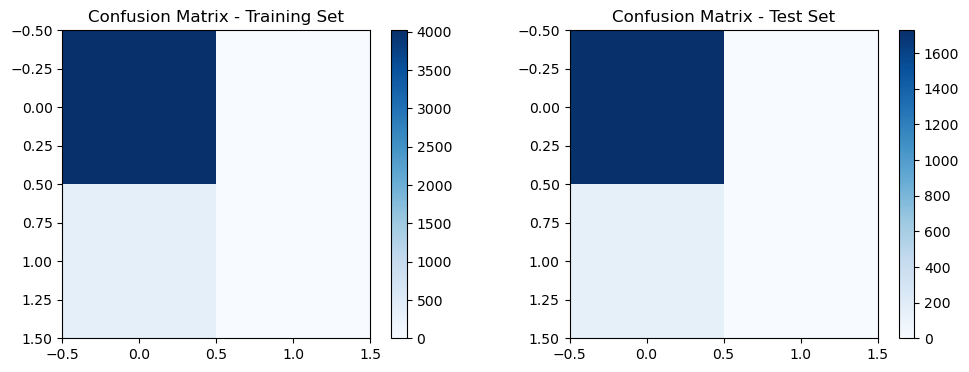

In [114]:
# Plot confusion matrix
cm_train = confusion_matrix(y_1_train, logreg_3.predict(X_1_train))
cm_test = confusion_matrix(y_1_test, y_pred_3)

plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.imshow(cm_train, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix - Training Set')
plt.colorbar()

plt.subplot(1, 2, 2)
plt.imshow(cm_test, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix - Test Set')
plt.colorbar()
# Save confusion matrix plots as images
plt.savefig('confusion_matrix_log_reg.png')
plt.show()

In [100]:
num_features_train = X_1_train.shape[1]
num_features_test = X_1_test.shape[1]

print(f"Number of features in training set: {num_features_train}")
print(f"Number of features in test set: {num_features_test}")

Number of features in training set: 8
Number of features in test set: 8


In [101]:
# Assuming X_1_train is a DataFrame
feature_names_train = X_1_train.columns

print(f"Feature Names in Training Set: {feature_names_train}")

Feature Names in Training Set: Index(['soil_consistency_2', 'soil_consistency_3', 'soil_consistency_4',
       'soil_consistency_5', 'traffic_load_2', 'traffic_load_3',
       'traffic_load_4', 'traffic_load_5'],
      dtype='object')


Note: Since I have 8 features in both the training and test sets, visualizing the decision boundaries directly in a 2D plot may not be as meaningful. In this cases, i will use dimensionality reduction techniques, such as PCA (Principal Component Analysis), to reduce the dimensionality and visualize the data in a more manageable way.

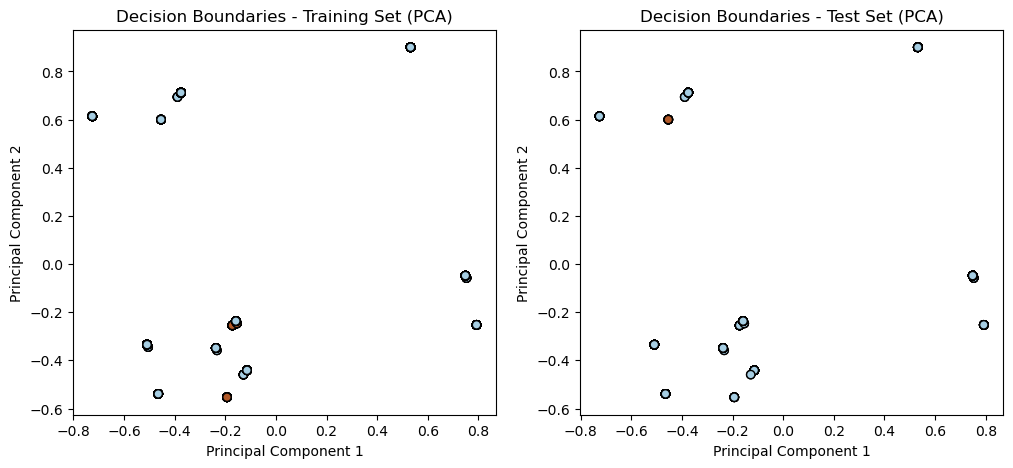

In [115]:
from sklearn.decomposition import PCA
# Apply PCA to reduce dimensionality to 2 components
pca = PCA(n_components=2)
X_1_train_pca = pca.fit_transform(X_1_train)
X_1_test_pca = pca.transform(X_1_test)

# Create and fit the logistic regression model on the reduced training data
logreg_3_pca = LogisticRegression()
model_3_pca = logreg_3_pca.fit(X_1_train_pca, y_1_train)

# Make predictions on the reduced test set
y_pred_3_pca = logreg_3_pca.predict(X_1_test_pca)

# Plot decision boundaries for the reduced 2D dataset
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.scatter(X_1_train_pca[:, 0], X_1_train_pca[:, 1], c=y_1_train, cmap=plt.cm.Paired, edgecolors='k')
plt.title('Decision Boundaries - Training Set (PCA)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')

plt.subplot(1, 2, 2)
plt.scatter(X_1_test_pca[:, 0], X_1_test_pca[:, 1], c=y_1_test, cmap=plt.cm.Paired, edgecolors='k')
plt.title('Decision Boundaries - Test Set (PCA)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
# Save  plots as images
plt.savefig('decision_boundaries_log_reg.png')

plt.show()

### Observation: The dataset is imbalanced, with the majority of samples belonging to the blue class (e.g., failure not occurred) and only a small number of samples belonging to the red class (e.g., failure occurred).

In [75]:
# Get coefficients and odds ratios for the cast iron subset
coefficients_1 = pd.DataFrame(logreg_3.coef_[0], index=X_1.columns, columns=['Coefficient'])
odds_ratios_1 = pd.DataFrame({'Odds Ratio': np.round(np.exp(logreg_3.coef_[0]), 4)}, index=X_1.columns)

# Print coefficients and odds ratios for the cast iron subset
print("Coefficients:")
print(coefficients_1)
print("\nOdds Ratios:")
print(odds_ratios_1)

Coefficients:
                    Coefficient
soil_consistency_2    -0.040649
soil_consistency_3    -0.315905
soil_consistency_4     0.030977
soil_consistency_5     0.302840
traffic_load_2        -0.133128
traffic_load_3        -0.021911
traffic_load_4        -0.329116
traffic_load_5        -0.082121

Odds Ratios:
                    Odds Ratio
soil_consistency_2      0.9602
soil_consistency_3      0.7291
soil_consistency_4      1.0315
soil_consistency_5      1.3537
traffic_load_2          0.8754
traffic_load_3          0.9783
traffic_load_4          0.7196
traffic_load_5          0.9212


In [76]:
# Evaluate the model
print('Accuracy:', accuracy_score(y_1_test, y_pred_3))
print('\nConfusion Matrix:\n', confusion_matrix(y_1_test, y_pred_3))
print('\nClassification Report:\n', classification_report(y_1_test, y_pred_3))

Accuracy: 0.9220917822838848

Confusion Matrix:
 [[1728    0]
 [ 146    0]]

Classification Report:
               precision    recall  f1-score   support

           0       0.92      1.00      0.96      1728
           1       0.00      0.00      0.00       146

    accuracy                           0.92      1874
   macro avg       0.46      0.50      0.48      1874
weighted avg       0.85      0.92      0.88      1874



C:\Users\Sanja\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Sanja\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Sanja\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


#### Note: there is 'the UndefinedMetricWarning' warning that is triggered because the class 1 in the target variable has no predicted samples

#### In summary, (the same scenario like in the previous  mode) while the model has high accuracy, it's not performing well in identifying instances of the positive class- The dataset is imbalanced. Further investigation is needed or exploring different modeling approaches.

Here are some steps I can consider in the further analysis:

#### A. Imbalanced Class Handling:

Explore techniques to handle imbalanced classes. This might involve using different sampling strategies during training (oversampling the minority class, undersampling the majority class, or using more advanced methods like SMOTE.

#### B. Different Models:

Experiment with different classification algorithms. Some models might handle imbalanced datasets better than others. Random Forests, Gradient Boosting, or Support Vector Machines are examples of models that can be effective in such scenarios.

## 05. Imbalanced class handling, using SMOTE (Synthetic Minority Over-Sampling Technique) 

## 5.1 SMOTE  for dataset 1

In [78]:
# Address the class imbalance using the imbalanced-learn library:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Split data into a training set and a test set.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# Create SMOTE object
smote = SMOTE(random_state=42)

# Fit and apply the resampling
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Create a logistic regression model
logreg_2 = LogisticRegression()

# Fit the model on the resampled training data
model_2 = logreg_2.fit(X_train_resampled, y_train_resampled)

# Make predictions on the original test set
y_pred_2 = logreg_2.predict(X_test)

# Evaluate the model
print('Accuracy:', accuracy_score(y_test, y_pred_2))
print('\nConfusion Matrix:\n', confusion_matrix(y_test, y_pred_2))
print('\nClassification Report:\n', classification_report(y_test, y_pred_2))

Accuracy: 0.45060106234274533

Confusion Matrix:
 [[7756 9592]
 [ 234  303]]

Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.45      0.61     17348
           1       0.03      0.56      0.06       537

    accuracy                           0.45     17885
   macro avg       0.50      0.51      0.34     17885
weighted avg       0.94      0.45      0.60     17885



###  Observations and Conclusions conserning Model 1 and Model 2 (resampled data using SMOTE) for dataset 1:
#### Accuracy:

Model 1 has high accuracy, suggesting that it correctly predicts the majority of instances.
Model 2 has significantly lower accuracy, indicating poor overall performance.
#### Class Imbalance:

Both models exhibit a class imbalance issue, especially in predicting instances of class 1. This is evident from the low recall, precision, and F1-score for class 1 in both models.
#### Model 1 - Class 1:

Model 1 predicts all instances as class 0, resulting in perfect precision and accuracy for class 0. However, it fails to identify any instances of class 1, leading to zero recall and F1-score for class 1.
#### Model 2 - Class 1:

Model 2, while having a balanced precision and recall for class 1, still performs poorly with low values for both metrics.
#### Considerations:

Class imbalance should be addressed in both models to improve their ability to correctly predict instances of the minority class (class 1).
Further analysis, feature engineering, or model tuning may be needed to enhance the predictive performance, especially for class 1.
#### Model Selection:

Model 1 is not be suitable for practical use, as it fails to predict instances of class 1.
Model 2, despite its lower accuracy, at least attempts to predict class 1.
#### In summary, both models have limitations, and improvements are needed, especially in handling class imbalance and enhancing the ability to predict instances of the minority class.

## 5.2.  SMOTE  for dataset 2 ( cast iron pipes)

In [79]:
# Address the class imbalance using the imbalanced-learn library:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Split data into a training set and a test set.
X_1_train, X_1_test, y_1_train, y_1_test = train_test_split(X_1, y_1, test_size=0.3, random_state=0)

# Create SMOTE object
smote = SMOTE(random_state=42)

# Fit and apply the resampling
X_train_resampled_1, y_train_resampled_1 = smote.fit_resample(X_1_train, y_1_train)

# Create a logistic regression model
logreg_4 = LogisticRegression()

# Fit the model on the resampled training data
model_4 = logreg_4.fit(X_train_resampled_1, y_train_resampled_1)

# Make predictions on the original test set
y_pred_4 = logreg_4.predict(X_1_test)

# Evaluate the model
print('Accuracy:', accuracy_score(y_1_test, y_pred_4))
print('\nConfusion Matrix:\n', confusion_matrix(y_1_test, y_pred_4))
print('\nClassification Report:\n', classification_report(y_1_test, y_pred_4))

Accuracy: 0.33884738527214514

Confusion Matrix:
 [[ 513 1215]
 [  24  122]]

Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.30      0.45      1728
           1       0.09      0.84      0.16       146

    accuracy                           0.34      1874
   macro avg       0.52      0.57      0.31      1874
weighted avg       0.89      0.34      0.43      1874



In [105]:
# Inspect Resampled Class Distribution: After applying SMOTE, check the distribution of class labels in the resampled training set to ensure that both classes are adequately represented
pd.Series(y_train_resampled_1).value_counts()

0    4018
1    4018
Name: failure_occurred_on_pipe, dtype: int64

#### Observation: It looks like the resampling using SMOTE has successfully balanced the class distribution in the training set. Each class now has an equal number of samples (4018), which is good for addressing the class imbalance.

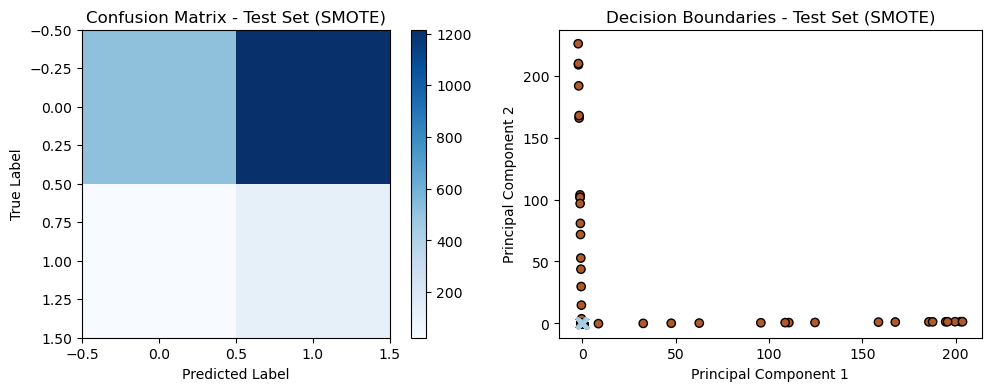

In [116]:
# Visualize the confusion matrix for the test set
cm_test_smote = confusion_matrix(y_1_test, y_pred_4)

plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.imshow(cm_test_smote, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix - Test Set (SMOTE)')
plt.colorbar()
plt.xlabel('Predicted Label')
plt.ylabel('True Label')

# Apply PCA to reduce dimensionality to 2 components
pca_smote = PCA(n_components=2)
X_train_resampled_pca = pca_smote.fit_transform(X_train_resampled_1)
X_test_pca = pca_smote.transform(X_1_test)

# Create and fit the logistic regression model on the reduced training data
logreg_4_pca = LogisticRegression()
model_4_pca = logreg_4_pca.fit(X_train_resampled_pca, y_train_resampled_1)

# Make predictions on the reduced test set
y_pred_4_pca = logreg_4_pca.predict(X_test_pca)

# Plot decision boundaries for the reduced 2D dataset
plt.subplot(1, 2, 2)
plt.scatter(X_train_resampled_pca[:, 0], X_train_resampled_pca[:, 1], c=y_train_resampled_1, cmap=plt.cm.Paired, edgecolors='k')
plt.scatter(X_test_pca[:, 0], X_test_pca[:, 1], c=y_1_test, cmap=plt.cm.Paired, marker='x', s=50)  # Increase marker size
plt.title('Decision Boundaries - Test Set (SMOTE)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
# Save  plots as images
plt.savefig('decision_boundaries_log_reg_SMOTE.png')
plt.show()

### Observation: Examining the decision boundary visualization provides a glimpse into the logistic regression model's proficiency in distinguishing between the two classes: red points (representing failure not occurred) and blue 'X' markers (indicating failure occurred) in the reduced feature space. Despite employing the SMOTE technique to address class imbalance, the model's capacity to capture patterns in the minority class appears constrained.

###  Observations and Conclusions conserning Model 3 and Model 4 (resampled data using SMOTE) for dataset 2:
#### Observations:
- The accuracy has dropped significantly to 33.88% after applying SMOTE.
- The precision, recall, and f1-score for class 1 have improved compared to Model 3, but they are still relatively low.

#### Conclusion:
- SMOTE has helped improve the model's ability to identify failures (class 1), as seen in the improved recall and f1-score for class 1.
- Despite the improvement, the model's overall performance remains limited, and further adjustments may be needed to enhance its predictive capabilities.

## 06. Experimenting with different classification algorithms

## 6.1. Random Forests Algorithm, dataset 1

In [81]:
# Train Random Forest Model for dataset 1:

# Create a Random Forest Classifier
rf_model = RandomForestClassifier(random_state=42)

# Fit the model to the training data
rf_model.fit(X_train_resampled, y_train_resampled)

RandomForestClassifier(random_state=42)

In [91]:
# Make predictions on the test set
y_pred_5 = rf_model.predict(X_test)

In [83]:
# Evaluate the model
print('Accuracy:', accuracy_score(y_test, y_pred_5))
print('\nConfusion Matrix:\n', confusion_matrix(y_test, y_pred_5))
print('\nClassification Report:\n', classification_report(y_test, y_pred_5))

Accuracy: 0.4632373497344143

Confusion Matrix:
 [[7963 9385]
 [ 215  322]]

Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.46      0.62     17348
           1       0.03      0.60      0.06       537

    accuracy                           0.46     17885
   macro avg       0.50      0.53      0.34     17885
weighted avg       0.95      0.46      0.61     17885



#### Observation: The Model shows a comparable performance to Model 2 discussed in section 5.2 (Logistic Regression). Despite efforts, the overall effectiveness of the model appears constrained, indicating that additional refinements might be necessary to improve its predictive capabilities.

###  Feature Importance

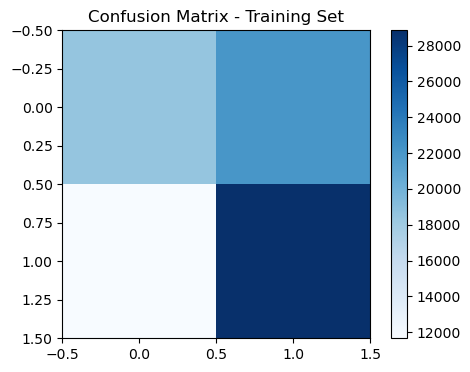

In [117]:
from sklearn.datasets import make_classification
# Assuming X_train_resampled, y_train_resampled, X_test, y_test are already defined

# Create a Random Forest Classifier
rf_model = RandomForestClassifier(random_state=42)

# Fit the model to the training data
rf_model.fit(X_train_resampled, y_train_resampled)

# Make predictions on the training set
y_train_pred = rf_model.predict(X_train_resampled)

# Make predictions on the test set
y_test_pred = rf_model.predict(X_test)

# Plot the confusion matrix for the training set
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
cm_train = confusion_matrix(y_train_resampled, y_train_pred)
plt.imshow(cm_train, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix - Training Set')
plt.colorbar()
# Save  plot as image
plt.savefig('conf_matrix_random_forests.png')

In [85]:
# Access feature importance scores
feature_importance = rf_model.feature_importances_

# Create a DataFrame to display feature names and their importance scores
feature_importance_df = pd.DataFrame({'Feature': X_train.columns, 'Importance': feature_importance})

# Sort the DataFrame by importance scores in descending order
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Print or visualize the feature importance
print("Feature Importance:")
print(feature_importance_df)

Feature Importance:
                Feature  Importance
9   soil_aggressivity_3    0.155200
5        traffic_load_3    0.149654
4        traffic_load_2    0.135451
11  stray_electricity_2    0.099120
12  stray_electricity_3    0.082905
2    soil_consistency_4    0.069728
6        traffic_load_4    0.066481
1    soil_consistency_3    0.064475
13  stray_electricity_4    0.063853
3    soil_consistency_5    0.051194
0    soil_consistency_2    0.025790
8   soil_aggressivity_2    0.018171
10  soil_aggressivity_4    0.016157
7        traffic_load_5    0.001821


#### Observation and Conclusions: 
- These scores are normalized and sum up to 1.0, indicating the proportion of importance that each feature contributes to the model.
- Higher Importance Score: Features with higher importance scores are considered more influential in predicting the target variable.
- Lower Importance Score: Features with lower scores are relatively less important in the model's predictions.
- In this instance, 'soil_aggressivity_3', 'traffic_load_3', and 'traffic_load_2' emerge as the most influential features. The identified influential features, such as 'soil_aggressivity_3', 'traffic_load_3', and 'traffic_load_2', may lack clear, direct interpretations in the context of pipe failure.

#### It appears that the investigeted model, despite its predictive capability, don't offer a straightforward or intuitive explanation regarding how environmental factors influence the occurrence of failures in pipes. For a clear understanding of the relationships between environmental factors and pipe failure, more advanced interpretability techniques or a different modeling approach may be needed. Additionally, domain expertise and further exploration of the data might provide additional insights.

## 6.2. XGBoost Algorithm, dataset 1

In [86]:
#Train XGBoost Model
dtrain = xgb.DMatrix(X_train_resampled, label=y_train_resampled)
param = {'objective': 'binary:logistic', 'eval_metric': 'logloss', 'eta': 0.1}
num_round = 100
model = xgb.train(param, dtrain, num_round)

In [87]:
#Make Predictions:
dtest = xgb.DMatrix(X_test)
y_pred_6 = model.predict(dtest)

In [88]:
# Assuming y_pred_6 contains predicted probabilities
y_pred_binary = (y_pred_6 >= 0.5).astype(int)

# Now, you can use accuracy_score and other classification metrics
print('Accuracy:', accuracy_score(y_test, y_pred_binary))
print('\nConfusion Matrix:\n', confusion_matrix(y_test, y_pred_binary))
print('\nClassification Report:\n', classification_report(y_test, y_pred_binary))

Accuracy: 0.49896561364271735

Confusion Matrix:
 [[8618 8730]
 [ 231  306]]

Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.50      0.66     17348
           1       0.03      0.57      0.06       537

    accuracy                           0.50     17885
   macro avg       0.50      0.53      0.36     17885
weighted avg       0.95      0.50      0.64     17885



### General Observations:
- All three models show relatively low accuracy, precision, recall, and F1-score for predicting failures (class 1).
- The models seem to struggle in correctly identifying instances of pipe failure, as indicated by low recall values for class 1.
- Precision, which measures the accuracy of the positive predictions, is also very low, suggesting a high number of false positives.
- The F1-score, which balances precision and recall, is also low, indicating poor overall model performance.
### Conclusion:
The models, regardless of the algorithm used, Logistic Regression, Random Forest or XGBoost Algorithm, are not performing well in predicting pipe failures  based on environmental factors. There might be underlying challenges in capturing the patterns or relationships between environmental factors and pipe failures using the given features.To gain a deeper understanding, further exploration using advanced interpretability techniques or alternative modeling approaches is recommended. Additionally, incorporating domain expertise and thorough data exploration may uncover valuable insights to enhance our understanding of the complex dynamics between environmental factors and pipe failures.



